In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [140]:
#afisam data setul ecommerce
df = pd.read_csv('Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [141]:
#informatii despre coloane
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [142]:
# stergem, scoatem coloanele care nu ne trebuie
# am scos Channel si Region
df = df.drop(['Channel', 'Region'], axis=1)

In [143]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [144]:
# scoatem matricea X
X = df.values

In [145]:
X

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [146]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [147]:
#verificam timpul de rulare
kmeans_random = KMeans(init='random')
kmeans_plut_plus = KMeans()

In [148]:
%%timeit -n 1 -r 1
kmeans_random.fit(X)

66 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [149]:
%%timeit -n 1 -r 1
kmeans_plut_plus.fit(X)

64.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [150]:
# sa gasim nr optimal de clustere
# creem o lista goala unde vom pastra scorurile noatre
scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    score = silhouette_score(X, y_pred)
    scores.append(score)

In [151]:
scores

[0.5115333898779053,
 0.4783511430782059,
 0.39012913652631787,
 0.3634715574068809,
 0.37401067293454965,
 0.342785073082484,
 0.3312603012298578,
 0.29729668017926203,
 0.30114850508138197]

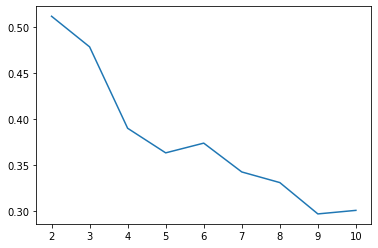

In [152]:
#grafic pentru scor
plt.plot(range(2,11), scores)

In [153]:
# facem un tabel cu 2 clustere
kmeans = KMeans(n_clusters=2)

In [154]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [155]:
# afisam vectorii medii cu kmeans
kmeans.cluster_centers_

array([[ 7944.112     ,  5151.81866667,  7536.128     ,  2484.13066667,
         2872.55733333,  1214.26133333],
       [35401.36923077,  9514.23076923, 10346.36923077,  6463.09230769,
         2933.04615385,  3316.84615385]])

In [156]:
# facem ca un tabel, analiza prescriptiva
clusters_table = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)

In [157]:
clusters_table

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,7944.112000,5151.818667,7536.128000,2484.130667,2872.557333,1214.261333
1,35401.369231,9514.230769,10346.369231,6463.092308,2933.046154,3316.846154


In [158]:
X = df[['Fresh','Milk', 'Grocery','Detergents_Paper']].values

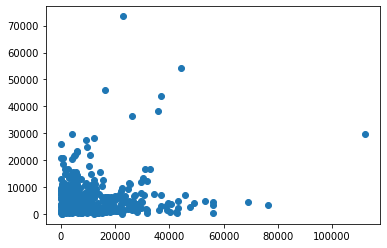

In [159]:
#graficul simplu
plt.scatter(X[:, 0], X[:, 1])

In [160]:
kmeans = KMeans(n_clusters=2)
cluster = kmeans.fit_predict(X)

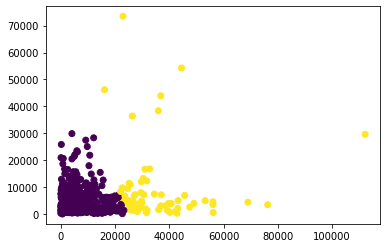

In [161]:
#graficul la kmeans
plt.scatter(X[:, 0], X[:, 1], c = cluster)

In [162]:
# importam gmm
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)

In [163]:
cluster = gmm.fit_predict(X)

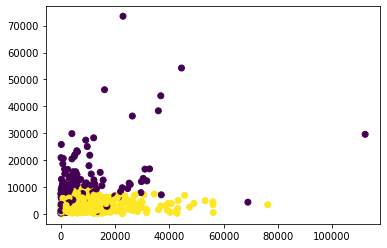

In [164]:
#graficul la gmm
plt.scatter(X[:, 0], X[:, 1], c = cluster)

In [165]:
# facem interpretarea
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariances, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariances.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariances)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariances)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)

    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covariances, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covariances, alpha=w * w_factor)

c:\users\mecc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


ValueError: too many values to unpack (expected 2)

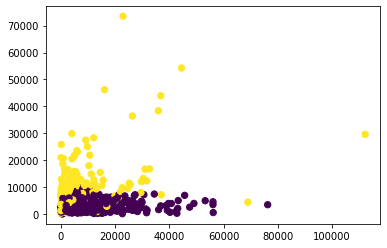

In [166]:
plot_gmm(gmm, X, label=True)